<a href="https://colab.research.google.com/github/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis/blob/main/01-introduction-cook-books/01_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install "numpy<2,>=1.13" "pandas~=1.1" "matplotlib<4,>=2.1" "scipy<2,>=0.18" "scikit-learn>=0.19" "mpl-axes-aligner<2,>=1.1"

In [ ]:
!git clone https://github.com/CANAL-amsterdam/Foundations-of-Cultural-and-Social-Data-Analysis
%cd Foundations-of-Cultural-and-Social-Data-Analysis/01-introduction-cook-books
!ls

In [3]:
import math
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
from sklearn.feature_selection import chi2

# Easy

In [4]:
#Load the cookbook data set, and set the year as the index column
df = pd.read_csv('data/feeding-america.csv', index_col='date')

In [5]:
# Display the first 10 rows of the DataFrame
df.head(10)

,book_id,ethnicgroup,recipe_class,region,ingredients
date,,,,,
1922,fofb.xml,mexican,soups,ethnic,chicken;green pepper;rice;salt;water
1922,fofb.xml,mexican,meatfishgame,ethnic,chicken;rice
1922,fofb.xml,mexican,soups,ethnic,allspice;milk
1922,fofb.xml,mexican,fruitvegbeans,ethnic,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,fofb.xml,mexican,eggscheesedairy,ethnic,butter;egg;green pepper;onion;parsley;pepper;s...
1922,fofb.xml,mexican,breadsweets,ethnic,rice;sauce;water
1922,fofb.xml,mexican,fruitvegbeans,ethnic,pulp;water
1922,fofb.xml,mexican,meatfishgame,ethnic,cayenne;chili pepper;chili pulp;fat;flour;garl...
1922,fofb.xml,mexican,meatfishgame,ethnic,almond;baking powder;corned husk;cornstarch;ga...


In [6]:
#extract the "region" column
df[["region"]]

,region
date,
1922,ethnic
1922,ethnic
1922,ethnic
1922,ethnic
1922,ethnic
...,...
1904,general
1904,general
1904,general


In [7]:
#Print the number of unique regions in the data set.
df["region"].nunique()

6

In [8]:
#Using the same "region" column, produce a frequency distribution of the regions in the data.
df["region"].value_counts()

general      35508
ethnic        7040
midwest       2043
northeast     1320
south         1094
west          1027
Name: region, dtype: int64

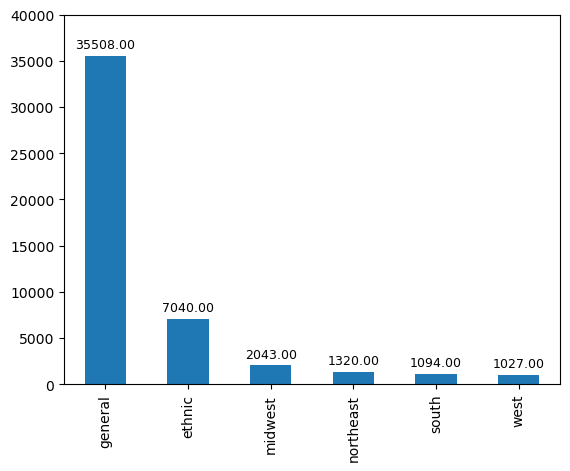

In [9]:
# Create a bar plot of the different regions annotated in the dataset.
plots = df["region"].value_counts().plot(kind='bar', color="C0", width=0.5)

# The following code is sourced from GeeksforGeeks.

# Loop through each bar in the bar plot
for bar in plots.patches:
    # Annotate the height of each bar on the plot
    # format(bar.get_height(), '.2f') formats the height to 2 decimal places
    # (bar.get_x() + bar.get_width() / 2, bar.get_height()) determines the position of the annotation to be at the center of the bar
    # ha and va  are set to 'center' to center-align the annotation
    # size' sets the font size of the annotation
    # xytext=(0, 8) free space between the annotation and bar
    # textcoords specifies the coordinate system of 'xytext', 'offset points' means the offset (in points) from the annotated point
    plots.annotate(format(bar.get_height(), '.2f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=9, xytext=(0, 8),
                   textcoords='offset points')

    # updating the range of the y-axis
    plt.ylim(0, 40000)
    
# show the plot
plt.show()

### Reflection

This bar chart includes six distinct regions, with the 'general' category's count significantly surpassing other categories at over 35,000 instances, while the counts for the other categories all fall below 10,000. 'General' may represent a broader type of category compared to other regional categories, so it might not be entirely appropriate to compare it directly with more specific categories such as 'midwest', 'northeast', and so on.

### Refrences: 
GeeksforGeeks. (2022, December 5). How to Annotate Bars in Barplot with Matplotlib in Python?. https://www.geeksforgeeks.org/how-to-annotate-bars-in-barplot-with-matplotlib-in-python/

# Moderate

In [10]:
# Use the function plot_trend() to create a time series plot for three or more ingredients of your own choice.

#extract the "ingredients" column
df[["ingredients"]]

,ingredients
date,
1922,chicken;green pepper;rice;salt;water
1922,chicken;rice
1922,allspice;milk
1922,breadcrumb;cheese;green pepper;pepper;salt;sar...
1922,butter;egg;green pepper;onion;parsley;pepper;s...
...,...
1904,egg white;egg yolk;gelatine;lemon;lemon juice;...
1904,cream;lemon juice;saccharine;salt;water
1904,lemon juice;orange juice;saccharine;water


In [11]:
# group all rows from the same year
grouped = df.groupby('date') 
# compute the size of each group
recipe_counts = grouped.size() 
#display the number of entries in each group by year
recipe_counts

date
1803     452
1807     929
1808     207
1815     276
1827      30
1830      94
1831     244
1832    2512
1838     446
1839     232
1840     718
1846       6
1847     364
1848     104
1850     573
1852    1384
1857     747
1864     660
1867      61
1868    1060
1869     545
1870    1126
1873    1538
1875     484
1876     695
1877    1089
1878    1563
1881     157
1882     786
1884     776
1885     715
1886    1254
1887    1510
1889     923
1890     198
1893    1656
1894    3690
1895     564
1896    1776
1897    1612
1901    1457
1902    1881
1904    1319
1905     964
1909    1307
1911     614
1912      39
1913     575
1914    1168
1915     559
1917     172
1918    1504
1919    2575
1920      34
1922     108
dtype: int64

In [12]:
# split ingredient strings into lists
ingredients = df['ingredients'].str.split(';')
ingredients

date
1922           [chicken, green pepper, rice, salt, water]
1922                                      [chicken, rice]
1922                                     [allspice, milk]
1922    [breadcrumb, cheese, green pepper, pepper, sal...
1922    [butter, egg, green pepper, onion, parsley, pe...
                              ...                        
1904    [egg white, egg yolk, gelatine, lemon, lemon j...
1904        [cream, lemon juice, saccharine, salt, water]
1904       [lemon juice, orange juice, saccharine, water]
1904    [grape fruit juice, grapefruit, juice, sacchar...
1904    [cream, egg, egg yolk, rum, saccharine, salt, ...
Name: ingredients, Length: 48032, dtype: object

In [13]:
# group all rows from the same year
groups = ingredients.groupby('date')

In [14]:
# merge the lists from the same year
ingredients = groups.sum()
# display the aggregated sum of ingredients for each group by year
ingredients

date
1803    [anchovy, bacon, beef, broth, claret, herb, on...
1807    [bone, cod, fish, head, jelly, meat, tongue, b...
1808    [bean, caper sauce, lettuce, onion, potato, wa...
1815    [flour, milk, potato, saleratus, salt, water, ...
1827    [egg yolk, anchovy sauce, cream, egg, fish, mi...
1830    [molass, water, beer, molass, sour beer, vineg...
1831    [ham, molass, salt, saltpetre, water, beef, mo...
1832    [butter, egg, jordan almond, lemon peel, mace,...
1838    [asparagus, bacon, butter, chicken, flour, mil...
1839    [flour, milk, molass, pearlash, salæratus, whe...
1840    [beef leg, cabbage, carrot, celery, garlic clo...
1846    [ash, corn, water, meal, water, potato, potato...
1847    [asparagus, bone, butter, calf foot, cayenne, ...
1848    [butter, egg, meal, milk, molass, salæratus, i...
1850    [fat, water, brine, pickle, pork, salt, ham, m...
1852    [bacon, beef, beef shin, broth, cow, fat, fowl...
1857    [breast, cayenne pepper, juice, lemon, salt, w...
1864    [

In [15]:
# compute counts per year
ingredients = ingredients.apply(pd.Series.value_counts)
# show the table 
ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,258.0,197.0,185.0,159.0,123.0,121.0,93.0,93.0,85.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,332.0,325.0,367.0,204.0,123.0,181.0,255.0,97.0,125.0,165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,110.0,77.0,81.0,73.0,54.0,31.0,82.0,24.0,29.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,110.0,87.0,89.0,119.0,42.0,23.0,107.0,5.0,10.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,2.0,18.0,NaN,1.0,1.0,12.0,6.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# normalise the counts
ingredients = ingredients.divide(recipe_counts, 0)
# show the table 
ingredients.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,0.570796,0.435841,0.409292,0.351770,0.272124,0.267699,0.205752,0.205752,0.188053,0.150442,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,0.357374,0.349839,0.395048,0.219591,0.132400,0.194833,0.274489,0.104413,0.134553,0.177610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,0.531401,0.371981,0.391304,0.352657,0.260870,0.149758,0.396135,0.115942,0.140097,0.294686,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,0.398551,0.315217,0.322464,0.431159,0.152174,0.083333,0.387681,0.018116,0.036232,0.347826,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,0.066667,0.600000,NaN,0.033333,0.033333,0.400000,0.200000,NaN,0.033333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
import scipy.stats

# Function to plot a trend line over time for a specified column in a DataFrame
def plot_trend(column, df, line_color='grey', xlim=(1810, 1930)):
    slope, intercept, _, _, _ = scipy.stats.linregress(
        df.index, df[column].fillna(0).values)  # Perform linear regression on the column data
    ax = df[column].plot(style='o', label=column) # Plot the column data as points
    ax.plot(df.index, intercept + slope * df.index, '--',
             color=line_color, label='_nolegend_') # Add a trend line using the slope and intercept from the regression
    ax.set_ylabel("fraction of recipes") # Set the y-axis label as 'fraction of recipes'
    ax.set_xlabel("year of publication") # # Set the x-axis label as 'year of publication'
    ax.set_xlim(xlim) # Set the limits of the x-axis to the provided xlim parameter

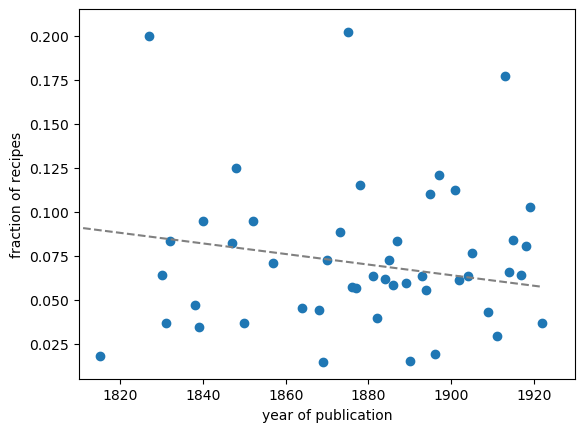

In [18]:
# Call the plot_trend function to visualize the trend of 'lemon' ingredient usage over time
plot_trend('lemon', ingredients)

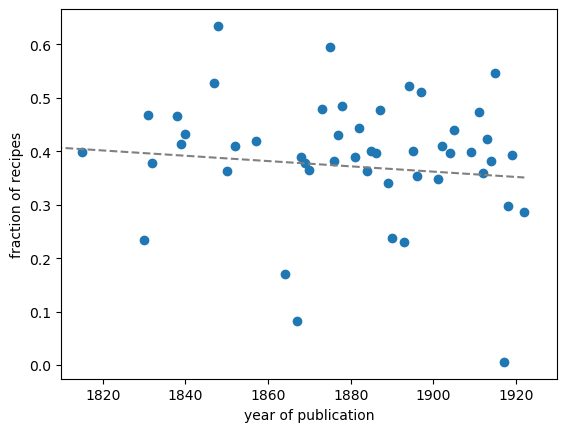

In [19]:
# Call the plot_trend function to visualize the trend of 'butter' ingredient usage over time
plot_trend('butter', ingredients)

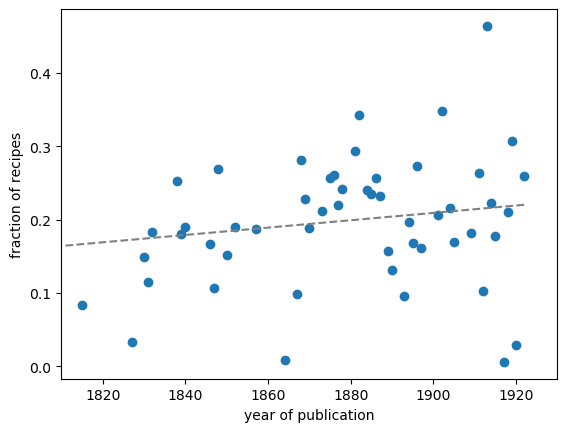

In [20]:
# Call the plot_trend function to visualize the trend of 'pepper' ingredient usage over time
plot_trend('pepper', ingredients)

### Reflection:

From the early 19th century to the early 20th century, the proportion of recipes using lemon shows an overall downward trend. The usage proportion of butter fluctuates more significantly but begins to show a slight decline starting from the early 20th century. The usage proportion of pepper was relatively stable before the mid-19th century and then demonstrated an increasing trend. The higher usage proportion of butter compared to the other two reflects its significant position in the culinary culture of that time, being widely used as a fundamental ingredient in recipes.

In [21]:
# Create a bar plot of the ten most distinctive ingredients for the pre- and postwar era using as keyness measure the Pearson's  𝜒2 test statistic.

from sklearn.feature_selection import chi2

# Transform the index into a list of labels, in which each label
# indicates whether a row stems from before or after the Civil War:
labels = ['Pre-Civil War' if year < 1864 else 'Post-Civil War' for year in ingredients.index]
# replace missing values with zero (.fillna(0)),
# and compute the chi2 statistic:
keyness, _ = chi2(ingredients.fillna(0), labels)
# Turn keyness values into a Series, and sort in descending order:
keyness = pd.Series(keyness, index=ingredients.columns).sort_values(ascending=False)

In [22]:
# Display the head of the keyness series
keyness.head(n=10)

nutmeg           1.072078
rice water       1.057412
loaf sugar       1.057213
mace             0.955977
pearlash         0.759318
lemon peel       0.694849
baking powder    0.608744
soda             0.589730
vanilla          0.533900
gravy            0.453685
dtype: float64

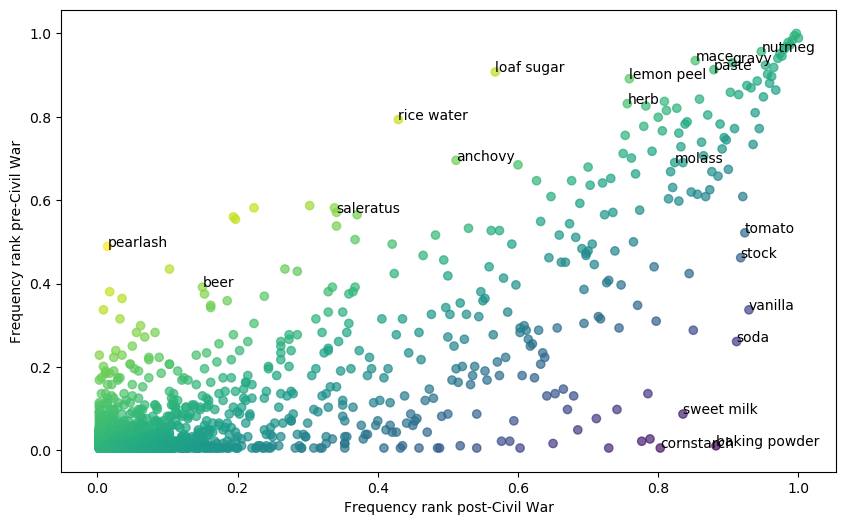

In [23]:
# step 1: compute summed ingredient counts per year
counts = df['ingredients'].str.split(';').groupby(
    'date').sum().apply(pd.Series.value_counts).fillna(0)

# step 2: construct frequency rankings for pre- and postwar years
pre_cw = counts[counts.index < 1864].sum().rank(method='dense', pct=True)
post_cw = counts[counts.index > 1864].sum().rank(method='dense', pct=True)

# step 3: merge the pre- and postwar data frames
rankings = pd.DataFrame({'Pre-Civil War': pre_cw, 'Post-Civil War': post_cw})

# step 4: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['Post-Civil War'], rankings['Pre-Civil War'],
            c=rankings['Pre-Civil War'] - rankings['Post-Civil War'],
            alpha=0.7)

# Add annotations of the 20 most distinctive ingredients
for i, row in rankings.loc[keyness.head(20).index].iterrows():
    plt.annotate(i, xy=(row['Post-Civil War'], row['Pre-Civil War']))

plt.xlabel("Frequency rank post-Civil War")
plt.ylabel("Frequency rank pre-Civil War");

### Reflection：

This plot illustrates the relative frequency changes of various ingredients in recipes before and after the Civil War. The horizontal axis represents the frequency rank after the Civil War, and the vertical axis represents the frequency rank before the Civil War. The frequency rank of an ingredient is based on its relative frequency among all ingredients. A rank closer to 0 indicates a higher frequency, while a rank closer to 1 indicates a lower frequency. Ingredients in the chart such as "loaf sugar" and "rice water" were significantly more common before the Civil War, whereas "cornstarch" and "baking powder" became more common after the war. This suggests an evolution in cooking techniques and food production methods from before to after the Civil War.

In [24]:
# Produce two time series plots: one for the absolute number of recipes involving baking powder as ingredient

# split ingredient strings into lists
ingredients_absolute = df['ingredients'].str.split(';')
# group all rows from the same year
groups_ingredients = ingredients_absolute.groupby('date')
# merge the lists from the same year
ingredients_absolute = groups_ingredients.sum()
# compute counts per year
ingredients_absolute = ingredients_absolute.apply(pd.Series.value_counts)

# display the table with absolute number
ingredients_absolute.head()

,butter,salt,water,flour,nutmeg,pepper,sugar,lemon,mace,egg,...,tomato in hot water,farina cream,pearl grit,chicken okra,tournedo,avocado,rock cod fillet,perch fillet,lime yeast,dried flower
date,,,,,,,,,,,,,,,,,,,,,
1803,258.0,197.0,185.0,159.0,123.0,121.0,93.0,93.0,85.0,68.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1807,332.0,325.0,367.0,204.0,123.0,181.0,255.0,97.0,125.0,165.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1808,110.0,77.0,81.0,73.0,54.0,31.0,82.0,24.0,29.0,61.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1815,110.0,87.0,89.0,119.0,42.0,23.0,107.0,5.0,10.0,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1827,NaN,2.0,18.0,NaN,1.0,1.0,12.0,6.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


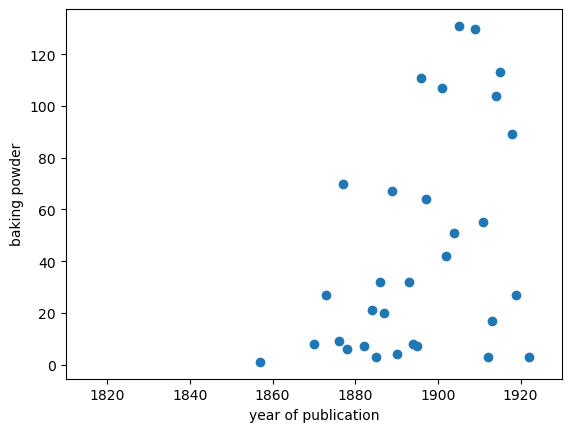

In [25]:
# plot the absolute number of recipes involving baking powder as ingredient
ax = ingredients_absolute['baking powder'].plot(style='o', xlim=(1810, 1930))
# Set the label for the y-axis to 'baking powder'
ax.set_ylabel("baking powder")
# Set the label for the x-axis to 'year of publication'
ax.set_xlabel("year of publication");

In [26]:
# a second plotting the absolute number "breadsweets" recipes over time.

# review the 'recipe_class' column
df[['recipe_class']]

,recipe_class
date,
1922,soups
1922,meatfishgame
1922,soups
1922,fruitvegbeans
1922,eggscheesedairy
...,...
1904,eggscheesedairy
1904,breadsweets
1904,beverages


In [27]:
# split recipe_class strings into lists
recipes = df['recipe_class'].str.split()
# group all rows from the same year
groups_recipes = recipes.groupby('date')
# merge the lists from the same year
recipes = groups_recipes.sum()
# compute counts per year
recipes = recipes.apply(pd.Series.value_counts)
#display the table
recipes.head()

,meatfishgame,breadsweets,fruitvegbeans,eggscheesedairy,accompaniments,beverages,soups,medhealth
date,,,,,,,,
1803,173.0,85.0,55.0,45.0,41.0,34.0,19.0,NaN
1807,335.0,219.0,97.0,64.0,88.0,60.0,38.0,28.0
1808,56.0,87.0,7.0,10.0,29.0,13.0,5.0,NaN
1815,42.0,132.0,28.0,44.0,20.0,5.0,4.0,1.0
1827,NaN,NaN,NaN,NaN,11.0,18.0,NaN,1.0


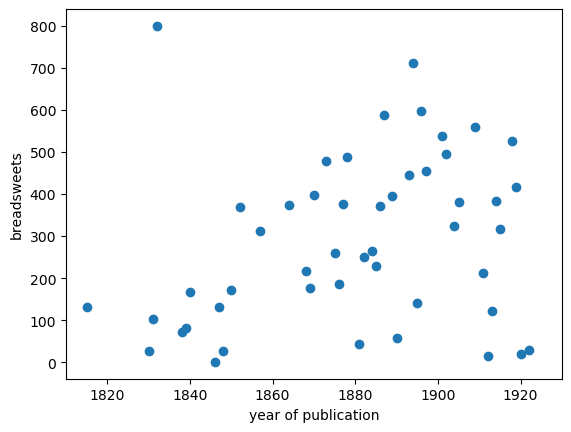

In [28]:
# plot the the absolute number "breadsweets" recipes over time
ax = recipes['breadsweets'].plot(style='o', xlim=(1810, 1930))
# Set the label for the y-axis to 'breadsweets'
ax.set_ylabel("breadsweets")
# Set the label for the x-axis to 'year of publication'
ax.set_xlabel("year of publication");

### Reflection
Over time, the frequency of "baking powder" usage in recipes appears to exhibit an increasing trend, particularly becoming more pronounced in the latter half of the 19th century. The use of "baking powder" reached a peak in the early 20th century. Although the overall trend is upward, there are significant fluctuations in usage in certain years.

# Challenging

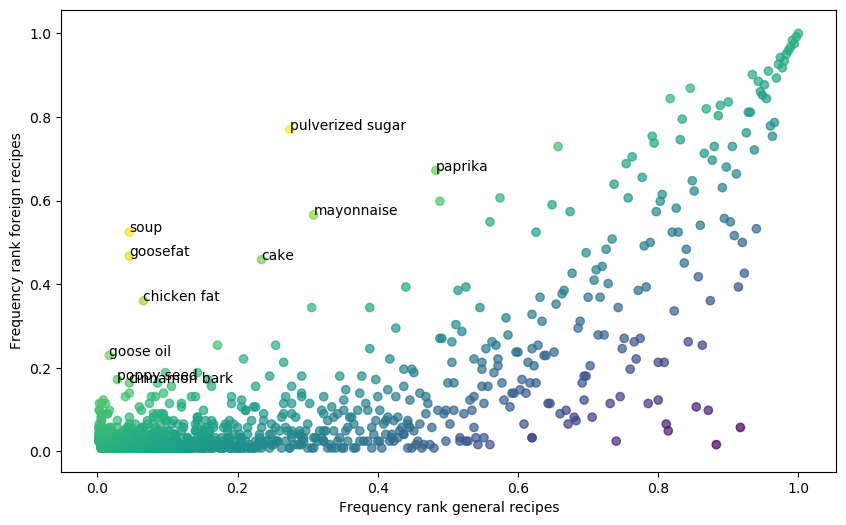

In [31]:
# Adapt the scatter plot code from section America's Culinary Melting 
#  Pot to find distinctive ingredients for two specific ethnic groups. 
#  (You could, for instance, contrast typical ingredients from the Jewish cuisine 
#  with those from the Creole culinary tradition.) How do these results differ from 
#  the ethnicity plot we created before? 

# step 1: add a new column indicating for each recipe whether
#         we have information about its ethnic group
df['creole'] = df['ethnicgroup'] == 'creole'
df['jewish'] = df['ethnicgroup'] == 'jewish'

# step 2: construct frequency rankings for creole' and jewish recipes
counts = df.groupby('creole')['ingredients'].apply(
    ';'.join).str.split(';').apply(pd.Series.value_counts).fillna(0)
counts = df.groupby('jewish')['ingredients'].apply(
    ';'.join).str.split(';').apply(pd.Series.value_counts).fillna(0)

creole_counts = counts.iloc[1].rank(method='dense', pct=True)
jewish_counts = counts.iloc[0].rank(method='dense', pct=True)

# step 3: merge the creole and jewish data frames
rankings = pd.DataFrame({'creole': creole_counts, 'jewish': jewish_counts})

# step 4: compute the keyness of ingredients in creole
#         as the difference in frequency ranks
keyness = (rankings['creole'] - rankings['jewish']).sort_values(ascending=False)

# step 5: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['jewish'], rankings['creole'],
            c=rankings['creole'] - rankings['jewish'],
            alpha=0.7)

for i, row in rankings.loc[keyness.head(10).index].iterrows():
    plt.annotate(i, xy=(row['jewish'], row['creole']))

plt.xlabel("Frequency rank general recipes")
plt.ylabel("Frequency rank foreign recipes");

In [32]:
df['region'].unique()

array(['ethnic', 'general', 'northeast', 'midwest', 'west', 'south'],
      dtype=object)

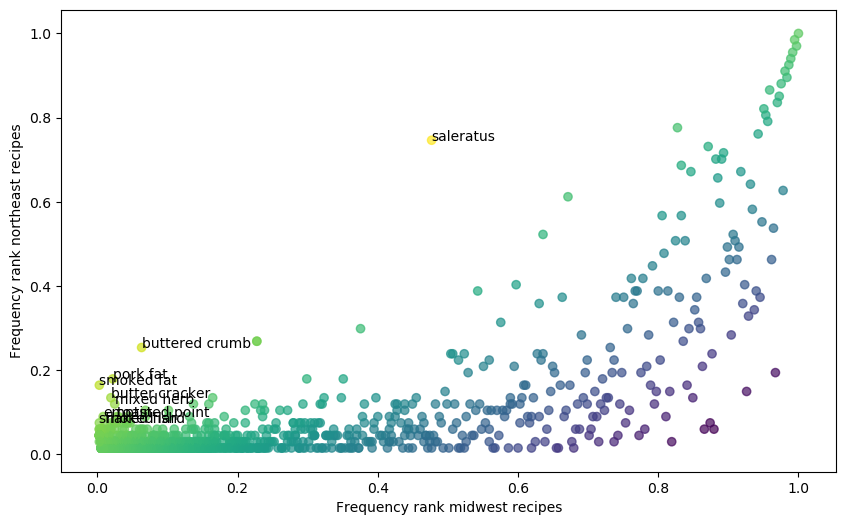

In [42]:
from scipy.stats import chi2_contingency
# step 1: add a new column indicating for each recipe whether
#         we have information about its ethnic group
df['northeast'] = df['region'] == 'northeast'
df['midwest'] = df['region'] == 'northeast'

# step 2: construct frequency rankings for creole' and jewish recipes
counts = df.groupby('northeast')['ingredients'].apply(
    ';'.join).str.split(';').apply(pd.Series.value_counts).fillna(0)
counts = df.groupby('midwest')['ingredients'].apply(
    ';'.join).str.split(';').apply(pd.Series.value_counts).fillna(0)

northeast_counts = counts.iloc[1].rank(method='dense', pct=True)
midwest_counts = counts.iloc[0].rank(method='dense', pct=True)

# step 3: merge the creole and jewish data frames
rankings = pd.DataFrame({'northeast': northeast_counts, 'midwest': midwest_counts})

# step 4: compute the keyness of ingredients in creole
#         as the difference in frequency ranks
keyness = (rankings['northeast'] - rankings['midwest']).sort_values(ascending=False)

# step 5: produce the plot
fig = plt.figure(figsize=(10, 6))
plt.scatter(rankings['midwest'], rankings['northeast'],
            c=rankings['northeast'] - rankings['midwest'],
            alpha=0.7)

for i, row in rankings.loc[keyness.head(10).index].iterrows():
    plt.annotate(i, xy=(row['midwest'], row['northeast']))

plt.xlabel("Frequency rank midwest recipes")
plt.ylabel("Frequency rank northeast recipes");